# 5.7a Neural Network without diabetes

### 5.7a.1 Model Training and Evaluation

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import ModelCheckpoint

class NN:
    
    def __init__(self):
        self.model = Sequential()

    def fit(self, X_train, y_train):

        # Standardize the features
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        
        # Define the filepath for saving the best model
        filepath = 'best_model_temp.h5'

        # Create a ModelCheckpoint callback to monitor validation loss and save the best model
        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

        
        num_classes = len(np.unique(y_train))
        y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)
        y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes)

        # Define the neural network model
        self.model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(num_classes, activation='softmax'))
        self.classes_ = np.unique(y_train)

        # Compile the model
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        # Train the model
        self.history = self.model.fit(X_train, y_train_encoded, epochs=15, batch_size=2, verbose=1, validation_data=(X_val, y_val_encoded), callbacks=[checkpoint])
        
        # save the best model over the different epochs
        self.model = tf.keras.models.load_model(filepath)
    def predict(self, X_test):
        scaler = StandardScaler()
        X_test = scaler.fit_transform(X_test)
        predict_x = self.model.predict(X_test) 
        classes_x = np.argmax(predict_x, axis=1)

        return classes_x




In [3]:
from util.functions import impute_and_train

df_without_diabetes =  pd.read_csv('processed/df_without_diabetes.csv')

results = impute_and_train(df_without_diabetes, NN,)

learning with mean imputed data
Cross-validation iteration 1/5
Epoch 1/15


2023-05-22 15:31:43.251345: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/67 [..............................] - ETA: 17s - loss: 0.7935 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.18339, saving model to best_model_temp.h5
67/67 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8806 - val_loss: 0.1834 - val_accuracy: 0.9412
Epoch 2/15
 1/67 [..............................] - ETA: 0s - loss: 0.1887 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.18339 to 0.08974, saving model to best_model_temp.h5
67/67 [==============================] - 0s 942us/step - loss: 0.0805 - accuracy: 1.0000 - val_loss: 0.0897 - val_accuracy: 0.9706
Epoch 3/15
 1/67 [..............................] - ETA: 0s - loss: 4.0366e-04 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.08974 to 0.06608, saving model to best_model_temp.h5
67/67 [==============================] - 0s 932us/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9706
Epoch 4/15
54/67 [=======================>......] - ETA: 0s - loss: 0.0150 -

/Users/luisastue/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


 1/67 [..............................] - ETA: 13s - loss: 0.6254 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.23330, saving model to best_model_temp.h5
67/67 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8284 - val_loss: 0.2333 - val_accuracy: 0.9412
Epoch 2/15
 1/67 [..............................] - ETA: 0s - loss: 0.2675 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.23330 to 0.11587, saving model to best_model_temp.h5
67/67 [==============================] - 0s 788us/step - loss: 0.1254 - accuracy: 0.9701 - val_loss: 0.1159 - val_accuracy: 0.9412
Epoch 3/15
 1/67 [..............................] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.11587 to 0.06678, saving model to best_model_temp.h5
67/67 [==============================] - 0s 747us/step - loss: 0.0549 - accuracy: 0.9851 - val_loss: 0.0668 - val_accuracy: 0.9706
Epoch 4/15
 1/67 [..............................] - ETA: 0s - loss: 0.0218 - acc

/Users/luisastue/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


 1/67 [..............................] - ETA: 13s - loss: 0.8100 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.21036, saving model to best_model_temp.h5
67/67 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.9179 - val_loss: 0.2104 - val_accuracy: 0.9412
Epoch 2/15
 1/67 [..............................] - ETA: 0s - loss: 0.1406 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.21036 to 0.12300, saving model to best_model_temp.h5
67/67 [==============================] - 0s 790us/step - loss: 0.1106 - accuracy: 0.9776 - val_loss: 0.1230 - val_accuracy: 0.9412
Epoch 3/15
 1/67 [..............................] - ETA: 0s - loss: 0.2094 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.12300 to 0.08552, saving model to best_model_temp.h5
67/67 [==============================] - 0s 727us/step - loss: 0.0476 - accuracy: 0.9925 - val_loss: 0.0855 - val_accuracy: 0.9412
Epoch 4/15
 1/67 [..............................] - ETA: 0s - loss: 0.0339 -

### 5.7a.2 Model Performance Visualization

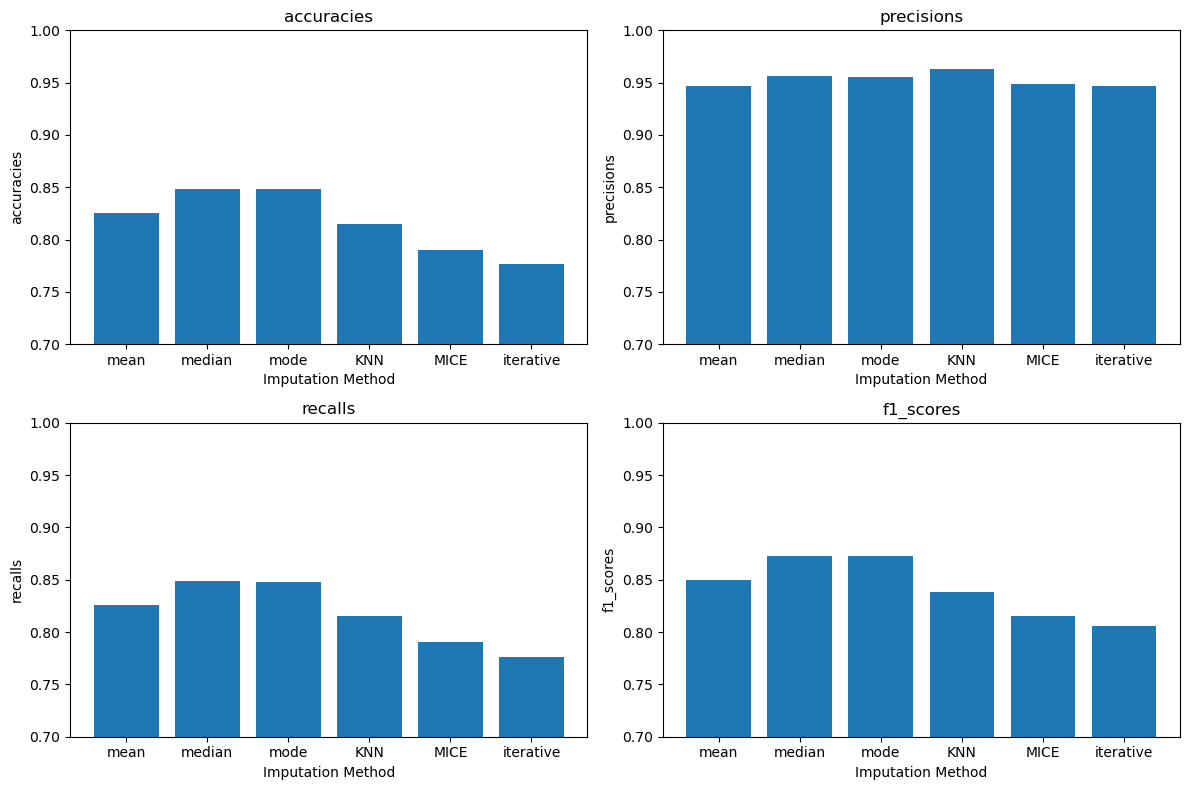

In [4]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


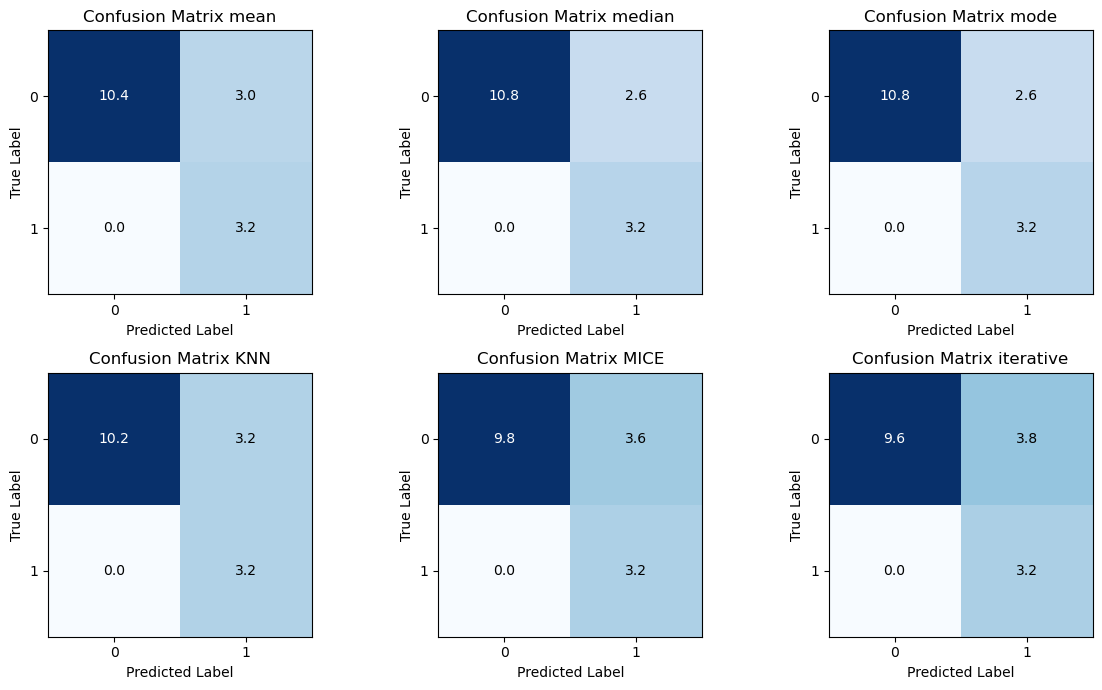

In [5]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

### 5.7.3 Loss Functions

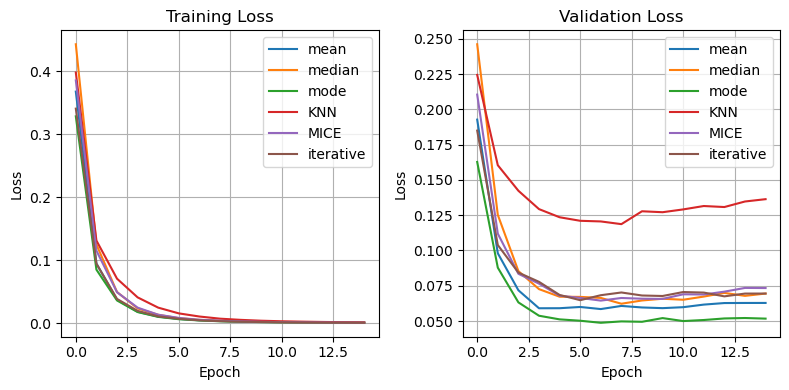

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for j, (name, models) in enumerate(results['models'].items()):
    losses = []
    val_losses = []
    for model in models:
        losses.append(model.history.history['loss'])
        val_losses.append(model.history.history['val_loss'])
        
    losses = np.mean(losses, axis=0)
    val_losses = np.mean(val_losses, axis=0)
    
    # Plot training and validation loss
    axs.flat[0].plot(losses)
    axs.flat[1].plot(val_losses)
axs.flat[0].grid()
axs.flat[1].grid()
axs.flat[0].set_xlabel('Epoch')
axs.flat[1].set_xlabel('Epoch')
axs.flat[0].set_ylabel('Loss')
axs.flat[1].set_ylabel('Loss')
axs.flat[0].legend(results['models'].keys())
axs.flat[1].legend(results['models'].keys())
axs.flat[0].set_title('Training Loss')
axs.flat[1].set_title('Validation Loss')

# Add a colorbar and adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

### 5.7.3 Feature Importance Evaluation

Interpret the weights of the first layer as feature importances

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from util.functions import plot_feature_importances
import numpy as np
# plot all feature importances as subplots
feature_importances = {}

feature_importances_df = pd.DataFrame(columns=df_without_diabetes.drop(columns=['class']).columns, index=pd.MultiIndex.from_product([results['models'].keys(), range(5)], names=['imputation', 'iteration']))

for (name, models) in results['models'].items():
    norm_coeff = []
    for nn in models:

        weights = nn.model.get_weights()

        # Compute the absolute sum of weights for each feature
        fimp = np.abs(weights[0]).sum(axis=1)

        # Normalize the feature importances
        normalized_importances = fimp / np.sum(fimp) 
        norm_coeff.append(normalized_importances)
        feature_importances_df.loc[(name, i)] = normalized_importances

    mean = np.mean(norm_coeff, axis=0)
    feature_importances[name] = pd.DataFrame(mean, index=df_without_diabetes.drop(columns=['class']).columns, columns=['Importance'])

feature_importances_df.to_csv('results/feature_importances_neural_network_without_diabetes.csv', index=True)
plot_feature_importances(feature_importances)

NameError: name 'i' is not defined